# Implement de l'algorithme de la descente de Gradient en Deep Learning

## Importation des packages

In [1]:
import warnings
#suppress warnings
# warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
plt.style.use('ggplot')

## Création du dataset

In [3]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print(f'Les de X: {X.shape}')
print(f'Les de y: {y.shape}')

Les de X: (100, 2)
Les de y: (100, 1)


## Répresentation graphique des données

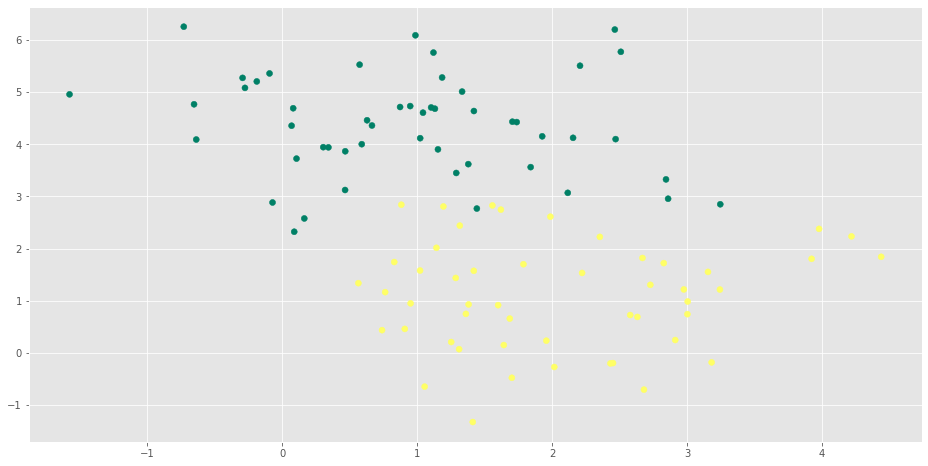

In [4]:
plt.figure(figsize=(16, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

## Création de la fonction initialisation

In [5]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    
    return (W, b)

## Testons la fonction d'initialisation

In [6]:
W, b = initialisation(X)

In [7]:
W

array([[-0.44317454],
       [ 0.03188404]])

In [8]:
b

array([-0.18795801])

## Création de la fonction d'activation

In [9]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

## Création du modèle

In [10]:
def modele(X, W, b):
    Z = X.dot(W) + b
#     print(Z.max())
    A = sigmoid(Z)
    
    return A

## Testons le  modèle

In [11]:
A = modele(X, W,b)

In [12]:
A.shape

(100, 1)

## Determinons la fonction coût

In [13]:
def fonction_cout(A, y):
    epsilon = 1e-15
    L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))
    
    return L

## Testons la fonction coût

In [14]:
Loss = fonction_cout(A, y)

In [15]:
Loss

0.9412526226930342

## Determination des gradients

In [16]:
def gradients(X, A, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    
    return (dW, db)

## Testons les Gradients

In [17]:
dW, db = gradients(X, A, y)

In [18]:
dW

array([[-0.65496619],
       [ 0.45825548]])

In [19]:
db

-0.17176215034726336

## Algorithme de mise à jour des paramètres W et b

In [20]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    return (W, b)

## Testons l'Algorithme de mise à jour des paramètres W et b

### W, b AVANT MISE A JOUR

In [21]:
W, b

(array([[-0.44317454],
        [ 0.03188404]]),
 array([-0.18795801]))

### W, b APRES MISE A JOUR

In [22]:
W, b = update(dW, db, W, b, 0.1)

In [23]:
W, b

(array([[-0.37767792],
        [-0.01394151]]),
 array([-0.1707818]))

In [24]:
from sklearn.metrics import accuracy_score

## La fonction de prédiction

In [25]:
def predict(X, W, b):
    A = modele(X, W, b)
    return A >= 0.5

## Ensemblages des differentes algorithme pour l'algorithme de descente de gradient

In [26]:
def algo_descente_gradient(X,y, learning_rate = 0.1, epochs = 100):
    ## Initialisation des paramètres
    W, b = initialisation(X)
    
    Loss = []
    ## Entrainement et amelioration des paramètre en fonction des sorties souhaités
    for i in range(epochs):
        ## appel du model 
        A = modele(X, W, b)
        
        ## Calcule des coût
        Loss.append(fonction_cout(A, y))
        
        ## Calcule des gradients
        dW, db = gradients(X, A, y)
        
        ## Optimisation des paramètres
        W, b = update(dW, db, W, b, learning_rate)
        
    ## Affichage du score
    y_pred = predict(X, W, y)
    
    score = accuracy_score(y, y_pred)
    print(f'Le Score est: {score}')
        
    ## Affichage de la courbe d'apprentissage
    plt.figure(figsize=(6,8))
    plt.plot(Loss)
    
    return (W, b)

Le Score est: 0.95


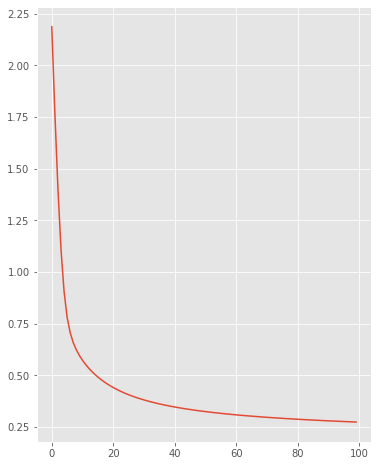

In [27]:
W, b = algo_descente_gradient(X, y)

In [28]:
from utilities import *

In [29]:
X_train, y_train, X_test, y_test = load_data()

C:\Users\damaro\AppData\Roaming\Python\Python38\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


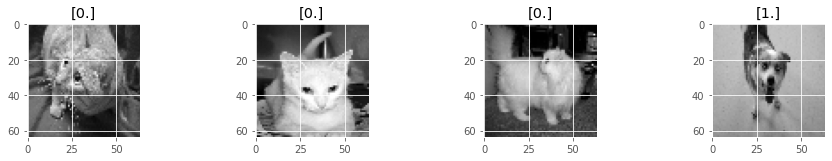

In [30]:
plt.figure(figsize=(16, 8))
for i in range(1, 5):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show();

In [31]:
# !pip install -U --user tqdm

In [32]:
from sklearn.metrics import log_loss
from tqdm import tqdm

In [33]:
def algo_descente_gradient_image(X_train, y_train, X_test, y_test, learning_rate = 0.1, epochs = 100):
    ## Initialisation des paramètres
    W, b = initialisation(X_train)
    train_acc = []
    train_loss = []
    
    test_acc = []
    test_loss = []
    ## Entrainement et amelioration des paramètre en fonction des sorties souhaités
    for i in tqdm(range(epochs)):
        ## appel du model 
        A_train = modele(X_train, W, b)
        A_test = modele(X_test, W, b)
        
        if i%10 == 0:
            ## Calcule des coût train
            train_loss.append(fonction_cout(y_train, A_train))
            ## train acc
            y_pred_train = predict(X_train, W, y_train)
            train_acc.append(accuracy_score(y_train, y_pred_train))
            
            ## Calcule des coût train
            test_loss.append(fonction_cout(y_test, A_test))
            ## train acc
            y_pred_test = predict(X_test, W, y_test)
            test_acc.append(accuracy_score(y_test, y_pred_test))
        
        ## Calcule des gradients
        dW, db = gradients(X_train, A_train, y_train)
        
        ## Optimisation des paramètres
        W, b = update(dW, db, W, b, learning_rate)
    
        
    ## Affichage de la courbe d'apprentissage
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.plot(test_loss, label="Test Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="Train accuracy")
    plt.plot(test_acc, label="Test accuracy")
    plt.legend()
    
    return (W, b)

In [34]:
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [35]:
X_train_flatten = X_train_flatten / X_train_flatten.max()
X_test_flatten = X_test_flatten / X_test_flatten.max()

100%|███████████████████████████████████████████████████████████████████| 10000/10000 [01:10<00:00, 142.54it/s]


(array([[-0.50712276],
        [ 1.04633803],
        [-0.17815404],
        ...,
        [ 1.54411377],
        [ 1.41909975],
        [ 1.07012174]]),
 array([-0.06232085]))

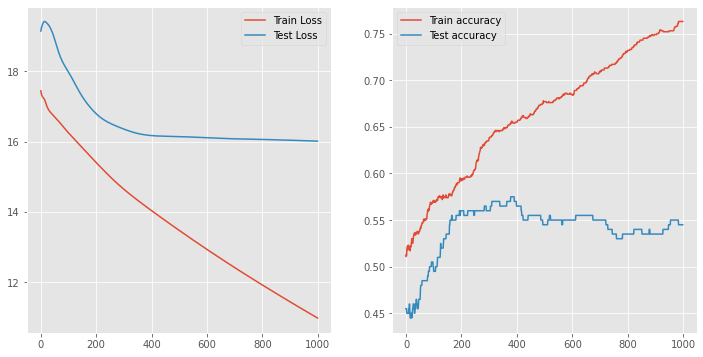

In [36]:
algo_descente_gradient_image(X_train_flatten, y_train, X_test_flatten, y_test, 0.01, 10000)

In [56]:
W

array([[ 1.38381927],
       [-0.88390158]])

In [57]:
b

array([-0.22219042])